## Technical Report Outlining Data Engineering Steps Taken:
1) Sketched out Entity Relationship Diagram (ERD) of employee database tables; specifying data types, primary keys and foreign keys.<br> 
2) Exported ERD to PostgreSQL thus creating table schemas and contraints for each of the six CSV files. <br>
3) Imported CSV files to each corresponding SQL table.

In [22]:
# For PostGREs and SQLAlchemy
!pip install psycopg2
!pip install pprint

In [23]:
# Dependencies and Setup
import psycopg2  
import pprint  

In [24]:
# Create Engine and Pass in Postgres Connection
# Setup to Connect to Database
conn = psycopg2.connect(user= 'postgres', password='Enter_your_password', database='SQL_Homework' )
cursor = conn.cursor()  

In [25]:
# Query to find average salary with title
cursor.execute('SELECT t.title, round(avg(s.salary),2) as "Average salary" FROM salaries s join title t on t.emp_no = s.emp_no group by title')

In [26]:
rows = cursor.fetchall()  

In [27]:
pprint.pprint(rows)  

[('Assistant Engineer', Decimal('48493.20')),
 ('Engineer', Decimal('48539.78')),
 ('Manager', Decimal('51531.04')),
 ('Senior Engineer', Decimal('48506.75')),
 ('Senior Staff', Decimal('58503.29')),
 ('Staff', Decimal('58465.27')),
 ('Technique Leader', Decimal('48580.51'))]


In [28]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# find the values and append to list
values  = []
i = 0
length = len(rows)
while i < length:
    values.append(rows[i][1])
    i += 1

In [30]:
# find the values for x_axis and append to the list
x_labels = []
i = 0
length1 = len(rows)
while i < length1:
    x_labels.append(rows[i][0])
    i += 1

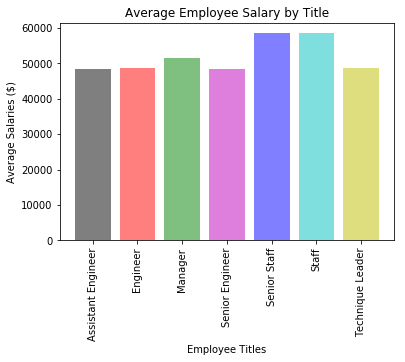

In [31]:
# Set x_axis, y_axis ,Tick Locations and plot the bar graph
plt.bar(x_labels, values, color=["k", "r", "g", "m", "b", "c", "y"], alpha=0.5, align="center")
plt.xticks(rotation="vertical")

# Set Labels & Title
plt.ylabel("Average Salaries ($)")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title")

# Save Figure
plt.savefig('Average_salary_by_title.png')

# Show plot
plt.show()